<a href="https://colab.research.google.com/github/BrendaChepkoech/Intelligent-Forecasting-Challenge/blob/main/Copy_of_Capstone_Project_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

The Main goal of this project is  to therefore build  a model that  predicts consumption for 11 contraceptives across 156 health service delivery sites in the public sector health system in Côte d’Ivoire. The predictions are to be made monthly from October to December 2019.

### b) Defining the Metric for Success
Our project will be considered a success if we're able to develop a model with the lowest  RMSE.

### c) Understanding the context 
Contraceptive utilization is the practice that helps individuals or couples avoid unwanted pregnancy. Beyond preventing unwanted pregnancy, contraceptive access is vital to safe motherhood and prosperous communities.  
It is important that contraceptives are widely available and easily accessible to anyone who is sexually active. According to the UN Contraceptive use by method 2019 Data Booklet  Africa has by far the lowest percentage of women using contraceptives. To be specific, 214 million women of reproductive age in developing regions have an unmet need for contraception. 

One of the main reasons for limited access is that health systems in these countries are unable to predict the quantity of contracept
and family planning. When too much product is ordered, unused contraceptives are wasted and left to expire. 
Accurate forecasting of contraceptive consumption can save lives, money, and time by ensuring health service delivery sites have what they need when they need it and by reducing waste in the supply chain.

### d) Recording the Experimental Design
1. Data Preparation
 - Loading Dependencies
 - Loading the Dataset
 - Dealing with Irrelevant Observations
 - Handling missing/duplicate values
 - Data Uniformity
 - Checking Outliers
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Modelling
 - Feature Engineering
 - Instantiating the Classifiers
 - Performance evaluation
 - Hyperparameter optimization
5. Performance Analysis
 - Assessing scores
6. Conclusions and Recommendations

### e) Data Relevance

Train Dataset is our main dataset.

Description of the variables in the primary dataset are as follows:

*  **Year**: year of the observation
*  **Month**: month of the observation
*  **Region**: higher level geographical area within Côte d'Ivoire
*  **District**: lower level geographical area within Côte d'Ivoire
*  **Site_code**: actual health service delivery site
*  **Product_code**: unique identifier for each commodity
*  **Stock_initial**: stock in hand of previous period. This is quantified in dispensing units
*  **Stock_received**: total quantity received in the last period. This is quantified in dispensing units
*  **Stock_distributed**{Target Variable}: quantity dispensed/consumed in the last reporting period. This is quantified in dispensing units
*  **Stock_adjustment**: all kinds of losses/ adjustments made at the facility
*  **Stock_end**: current physical count of stock in hand. This is quantified in dispensing units
*  **Average_monthly_consumption**: average monthly consumption for the last three months. This is quantified in dispensing units
*  **Stock_stockout_days**: total number of days facility was out of stock
*  **Stock_ordered**: the requested quantity. This is quantified in dispensing units.

## 2. Reading the Data

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Datasets from the source i.e. csv
train1 = pd.read_csv('Train.csv')
annual_data = pd.read_csv('annual_cases.csv')
mon_data = pd.read_csv('monthly_cases.csv')
prod_data = pd.read_csv('product.csv')
site_data = pd.read_csv('service_delivery_site_data.csv')



## 3. Checking the Data

#### Train Dataset

In [ ]:
# Determining the no. of records in our dataset(Train_data)
#
train1.shape

(35753, 14)

In [ ]:
# Previewing the top of our dataset
#
train1.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [ ]:
# Checking whether each column has an appropriate datatype
#
train1.dtypes

year                             int64
month                            int64
region                          object
district                        object
site_code                       object
product_code                    object
stock_initial                    int64
stock_received                   int64
stock_distributed                int64
stock_adjustment                 int64
stock_end                        int64
average_monthly_consumption      int64
stock_stockout_days              int64
stock_ordered                  float64
dtype: object

In [ ]:
#Checking for duplicates 
train1.duplicated().sum()

0

In [ ]:
#Checking for missing values 
train1.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_stockout_days              0
stock_ordered                  763
dtype: int64

In [ ]:
#Dealing with missing values 
train1.dropna(inplace= True)

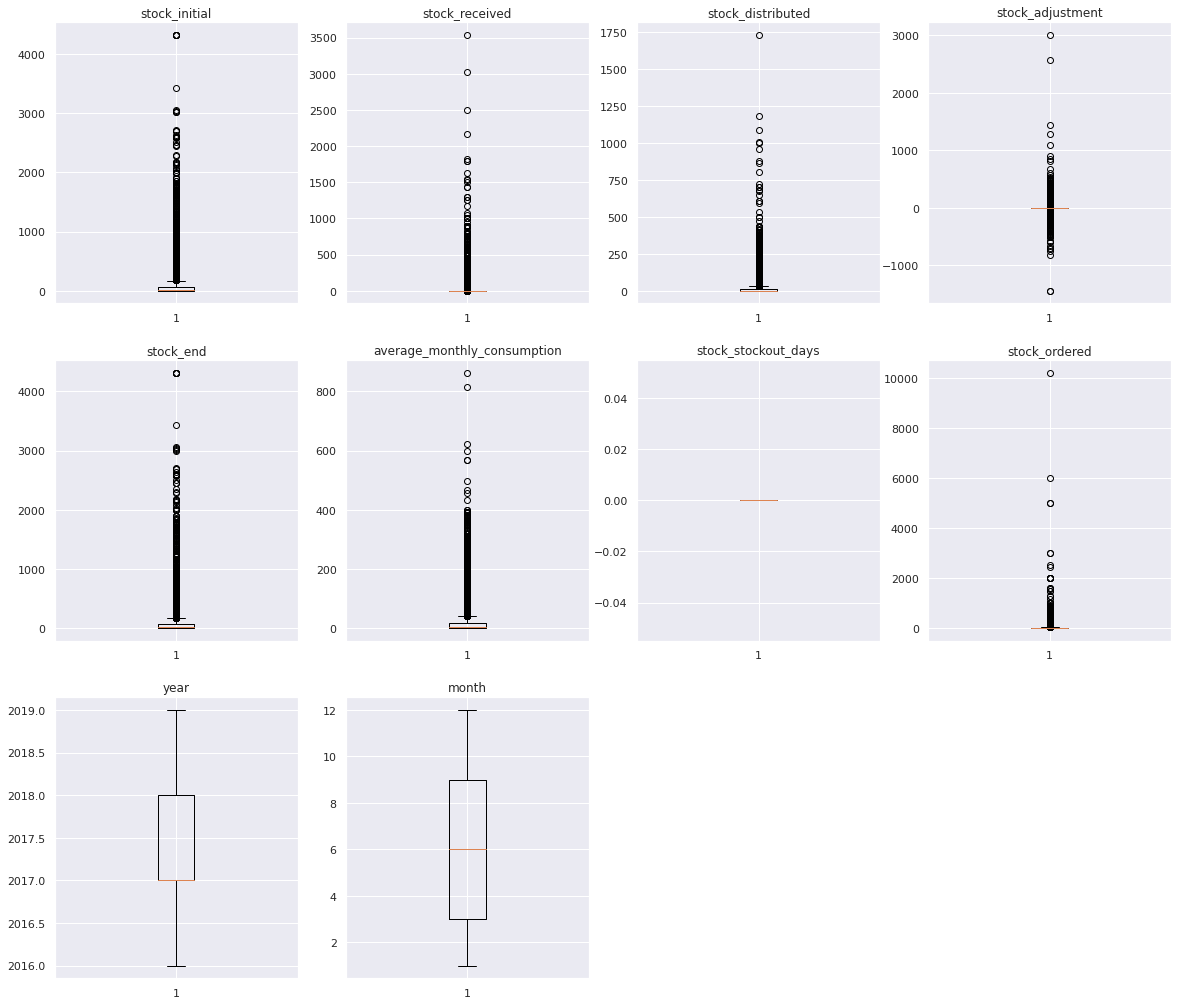

In [ ]:
#Checking for outliers 
Train_Numerics = {'stock_initial': 1, 'stock_received': 2, 'stock_distributed': 3,'stock_adjustment': 4,
              'stock_end': 5, 'average_monthly_consumption': 6, 'stock_stockout_days': 7,
              'stock_ordered': 8, 'year':9 ,'month':10}

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in Train_Numerics.items():
  plt.subplot(5,4,i)
  plt.boxplot(train1[variable])
  plt.title(variable)
plt.show()

#### Annual_cases

In [ ]:
# Determining the no. of records in our dataset(Train_data)
#
mon_data.shape

(678, 28)

In [ ]:
# Previewing the top of our dataset
#
mon_data.head()

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,NaN,NaN,NaN,75.0,44.0,1082.0,2542.0,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,NaN,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,35.0,NaN,3.0,1.0,36.0,66.0,874.0,404.0,45.0,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,24.0,NaN,1.0,1.0,71.0,47.0,813.0,545.0,14.0,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0


In [ ]:
# Checking whether each column has an appropriate datatype
#
mon_data.dtypes

district                        object
month                            int64
year                             int64
implant_women_old              float64
implant_women_new              float64
injection2_women_old           float64
injection2_women_new           float64
injection3_women_old             int64
injection3_women_new             int64
pill_women_old                 float64
pill_women_new                 float64
iud_women_old                  float64
iud_women_new                  float64
iud_number_dispensed           float64
implant_number_dispensed       float64
injection2_number_dispensed    float64
injection3_number_dispensed    float64
pill_number_dispensed          float64
iud_number_received            float64
implant_number_received        float64
injection2_number_received     float64
injection3_number_received     float64
pill_number_received           float64
iud_stock_end                  float64
implant_stock_end              float64
injection2_stock_end     

In [ ]:
#Checking for duplicates 
mon_data.duplicated().sum()

0

In [ ]:
#Checking for missing values 
mon_data.isnull().sum().sort_values(ascending = False)

injection2_stock_end           678
iud_stock_end                  678
iud_number_dispensed           429
iud_women_old                  428
iud_women_new                  372
iud_number_received            344
injection2_women_new           197
injection2_number_received     182
injection2_number_dispensed    170
injection2_women_old           122
pill_women_new                  83
implant_women_old               68
pill_number_dispensed           63
pill_number_received            63
pill_women_old                  57
pill_stock_end                  52
implant_number_received         35
implant_stock_end               33
implant_number_dispensed        29
injection3_number_received      21
injection3_stock_end            19
injection3_number_dispensed     16
implant_women_new                6
month                            0
injection3_women_new             0
injection3_women_old             0
year                             0
district                         0
dtype: int64

In [ ]:
#Dropping the iud_stock_end and injection2_stock_end
mon_data.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

In [ ]:
# filling the null values with zero
mon_data.fillna(0, inplace=True)
mon_data.isnull().sum()

district                       0
month                          0
year                           0
implant_women_old              0
implant_women_new              0
injection2_women_old           0
injection2_women_new           0
injection3_women_old           0
injection3_women_new           0
pill_women_old                 0
pill_women_new                 0
iud_women_old                  0
iud_women_new                  0
iud_number_dispensed           0
implant_number_dispensed       0
injection2_number_dispensed    0
injection3_number_dispensed    0
pill_number_dispensed          0
iud_number_received            0
implant_number_received        0
injection2_number_received     0
injection3_number_received     0
pill_number_received           0
implant_stock_end              0
injection3_stock_end           0
pill_stock_end                 0
dtype: int64

#### Annual Dataset

In [ ]:
annual_data.head()

,Unnamed: 0,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,117.0,15.0,26.0,823.0,3681.0,7082.0,6893.0,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,34.0,22.0,15.0,483.0,2894.0,6460.0,6339.0,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,20.0,24.0,19.0,438.0,3167.0,5394.0,5982.0,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,383.0,180.0,155.0,2372.0,878.0,9512.0,5234.0,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,147.0,259.0,258.0,3066.0,1805.0,8939.0,6957.0,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [ ]:
#Checking for missing values 
annual_data.isnull().sum().sort_values(ascending = False)

injection2_stock_end           339
iud_stock_end                  339
iud_women_old                  127
iud_number_dispensed           106
iud_number_received             94
pill_stock_end                  73
implant_stock_end               73
injection3_stock_end            68
iud_women_new                   62
implant_women_old               13
injection2_number_received      11
injection2_number_dispensed      8
pill_number_received             7
implant_number_received          6
implant_number_dispensed         6
pill_number_dispensed            5
injection2_women_new             5
injection3_number_received       2
injection2_women_old             2
implant_women_new                2
injection3_number_dispensed      1
pill_women_new                   1
district                         0
pill_women_old                   0
injection3_women_new             0
injection3_women_old             0
year                             0
Unnamed: 0                       0
dtype: int64

In [ ]:
#Dropping the iud_stock_end and injection2_stock_end
annual_data.drop(columns = ["iud_stock_end", "injection2_stock_end"], inplace = True)

In [ ]:
# filling the null values with zero
annual_data.fillna(0, inplace=True)
annual_data.isnull().sum()

Unnamed: 0                     0
district                       0
year                           0
implant_women_old              0
implant_women_new              0
injection2_women_old           0
injection2_women_new           0
injection3_women_old           0
injection3_women_new           0
pill_women_old                 0
pill_women_new                 0
iud_women_old                  0
iud_women_new                  0
iud_number_dispensed           0
implant_number_dispensed       0
injection2_number_dispensed    0
injection3_number_dispensed    0
pill_number_dispensed          0
iud_number_received            0
implant_number_received        0
injection2_number_received     0
injection3_number_received     0
pill_number_received           0
implant_stock_end              0
injection3_stock_end           0
pill_stock_end                 0
dtype: int64

In [ ]:
serv_data=pd.read_csv("/content/service_delivery_site_data.csv")
#Merging Product file, Service delivery site data with The train dataset
train = train1.merge(serv_data[['site_code','site_type','site_latitude','site_longitude']],on='site_code')
train = train.merge(prod_data[['product_code','product_type','product_name']],on='product_code')
train.head(5)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
1,2019,2,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,0,0,0,0,18,0,100.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2,2019,3,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,100,0,0,100,7,0,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
3,2019,4,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,100,0,2,0,98,1,0,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
4,2019,5,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,98,0,31,0,67,11,0,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE


In [ ]:
train2.to_csv("train_cleaned.csv")

In [ ]:
train.shape

(34990, 19)

In [ ]:
#convert to date time
train['date'] = train['year'].astype(str) + '-' + train['month'].astype(str)

train['date'] = pd.to_datetime(train['date'],yearfirst=True)
train2 = train.copy()
train = train.set_index('date')
train.tail(5)


,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
date,,,,,,,,,,,,,,,,,,,
2016-12-01,2016,12,ABIDJAN 2,ABOBO-EST,C1080,AS42018,0,0,0,0,0,0,0,0.0,Hospital,5.429302,-4.019587,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE
2016-08-01,2016,8,ABIDJAN 2,ABOBO-EST,C1080,AS42018,0,0,0,0,0,0,0,0.0,Hospital,5.429302,-4.019587,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE
2016-09-01,2016,9,ABIDJAN 2,ABOBO-EST,C1080,AS42018,0,0,0,0,0,0,0,0.0,Hospital,5.429302,-4.019587,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE
2016-10-01,2016,10,ABIDJAN 2,ABOBO-EST,C1080,AS42018,0,0,0,0,0,0,0,0.0,Hospital,5.429302,-4.019587,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE
2016-07-01,2016,7,ABIDJAN 2,ABOBO-EST,C1080,AS42018,0,0,0,0,0,0,0,0.0,Hospital,5.429302,-4.019587,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE


We concatenated the year and month column to form a date column. Afterwards, we converted the date column to datetime format and set it as our index in the train dataset.

In [ ]:
train.sort_values(by='date',ascending=True, inplace = True)

# Looking at the unique values
train["year"].unique()

array([2016, 2017, 2018, 2019])

In [ ]:
train.tail(5)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
date,,,,,,,,,,,,,,,,,,,
2019-06-01,2019,6,CAVALLY-GUEMON,TOULEPLEU,C5021,AS27137,10,0,0,0,10,0,0,0.0,Hospital,6.580932,-8.412813,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE
2019-06-01,2019,6,ABIDJAN 2,COCODY-BINGERVILLE,C1056,AS27132,0,0,0,0,0,0,0,0.0,Health Center,5.338777,-4.006237,Oral Contraceptive (Pill),MICROLUT 0.03 MG BTE / 3 CYCLES BOITE
2019-06-01,2019,6,GBOKLE-NAWA-SAN PEDRO,SOUBRE,C2050,AS27133,101,0,10,0,91,3,0,0.0,Hospital,6.275380,-7.002960,Injectable Contraceptive,DEPO PROVERA/PETOGEN 150 MG / 3ML INJ BTE/25 B...
2019-06-01,2019,6,BOUNKANI-GONTOUGO,BOUNA,C4018,AS27132,16,0,15,0,1,10,0,29.0,Hospital,9.270750,-2.992600,Oral Contraceptive (Pill),MICROLUT 0.03 MG BTE / 3 CYCLES BOITE
2019-06-01,2019,6,MARAHOUE,BOUAFLE,C2011,AS42018,68,0,3,0,65,12,0,0.0,Health Center,6.925580,-6.047720,Intrauterine Device (IUD),COPPER TCU 380 A (CUIVRE) UNITE


We then sorted the dates of the train dataset in ascending order so that we can use it during the time series analysis.

In [ ]:
#Dropping the stock distributed column
train.drop(columns = ["stock_stockout_days"], inplace = True)
#we dropped the stock_distributed column along with the stock_stockout_days which 
#was plainly zero so as to ensure high quality in our dataset.

In [ ]:
train.isnull().sum()

year                           0
month                          0
region                         0
district                       0
site_code                      0
product_code                   0
stock_initial                  0
stock_received                 0
stock_distributed              0
stock_adjustment               0
stock_end                      0
average_monthly_consumption    0
stock_ordered                  0
site_type                      0
site_latitude                  0
site_longitude                 0
product_type                   0
product_name                   0
dtype: int64

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Exploratory Analysis

### Univeriate Analysis

In [ ]:
#train['product_code'] = train['product_code'].replace({'AS27134': 'Injectable Contraceptive(NORISTERAT)', 'AS17005': 'Female Condom', 'AS46000': 'Male Condom', 'AS27139': 'Emergency Contraceptive (Pill)', 'AS27137': 'Contraceptive Implant(JADELLE)', 'AS27138': 'Contraceptive Implant(IMPLANON)', 'AS21126': 'Injectable Contraceptive(MEDROXYPROGESTERONE)', 'AS27133': 'Injectable Contraceptive(DEPO PROVERA)', 'AS42018': 'Intrauterine Device (IUD)', 'AS27000': 'Oral Contraceptive Pill(MICROGYNON)', 'AS27132': 'Oral Contraceptive Pill(MICROLUT)'})

In [ ]:
#Duplicating train dataframe
train_eda = train

In [ ]:
train_eda.head(4)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
date,,,,,,,,,,,,,,,,,,
2016-01-01,2016,1,N'ZI-IFOU-MORONOU,DAOUKRO,C4019,AS27133,0,0,0,0,0,0,25.0,Hospital,7.057710,-3.964550,Injectable Contraceptive,DEPO PROVERA/PETOGEN 150 MG / 3ML INJ BTE/25 B...
2016-01-01,2016,1,ABIDJAN 2,KOUMASSI-PORT BOUET-VRIDI,C1058,AS27000,0,200,88,0,112,88,200.0,Hospital,5.287367,-3.969162,Oral Contraceptive (Pill),MICROGYNON 0.03/0.15 MG BTE / 3 CYCLES BOITE
2016-01-01,2016,1,SUD-COMOE,GRAND-BASSAM,C1090,AS27132,72,0,10,0,62,22,0.0,Hospital,5.207400,-3.735600,Oral Contraceptive (Pill),MICROLUT 0.03 MG BTE / 3 CYCLES BOITE
2016-01-01,2016,1,AGNEBY-TIASSA-ME,TIASSALE,C1112,AS27134,160,0,0,0,160,0,0.0,Hospital,5.890294,-4.829082,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE


In [ ]:
#Statistical summary 
train_eda.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_latitude,site_longitude
count,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000
mean,2017.444098,6.157073,63.360789,14.958131,14.892112,0.975336,64.402143,14.722006,26.658102,6.544934,-5.002917
std,1.020275,3.433967,169.464370,71.062948,40.092218,38.135708,171.681322,32.724458,107.166082,1.409089,1.321300
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.000000,4.410880,-8.412813
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.352146,-6.047720
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.000000,6.187810,-4.573300
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,20.000000,7.387150,-3.990899
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,10240.000000,10.495000,-2.798370


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


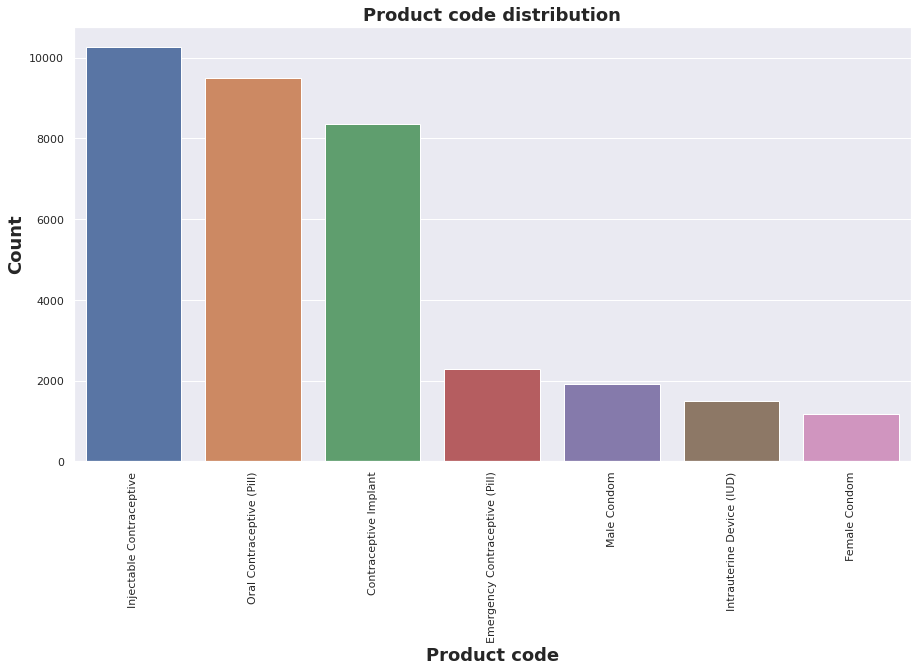

In [ ]:
#Plotting Products distribution
fontsize = 18
plt.figure(figsize=(15,8))
sns.countplot(train_eda['product_type'],data= train_eda, order = train_eda['product_type'].value_counts().index)
plt.title('Product code distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Product code',weight='bold',fontsize= fontsize)
plt.ylabel('Count',weight='bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

 * The most popular contraceptive is Injectable   Contraceptive(DEPO PROVERA) followed by Oral Contraceptive Pill(MICROGYNON)

 * The least popular contraceptive is Injectable Contraceptive(MEDROXYPROGESTERONE)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


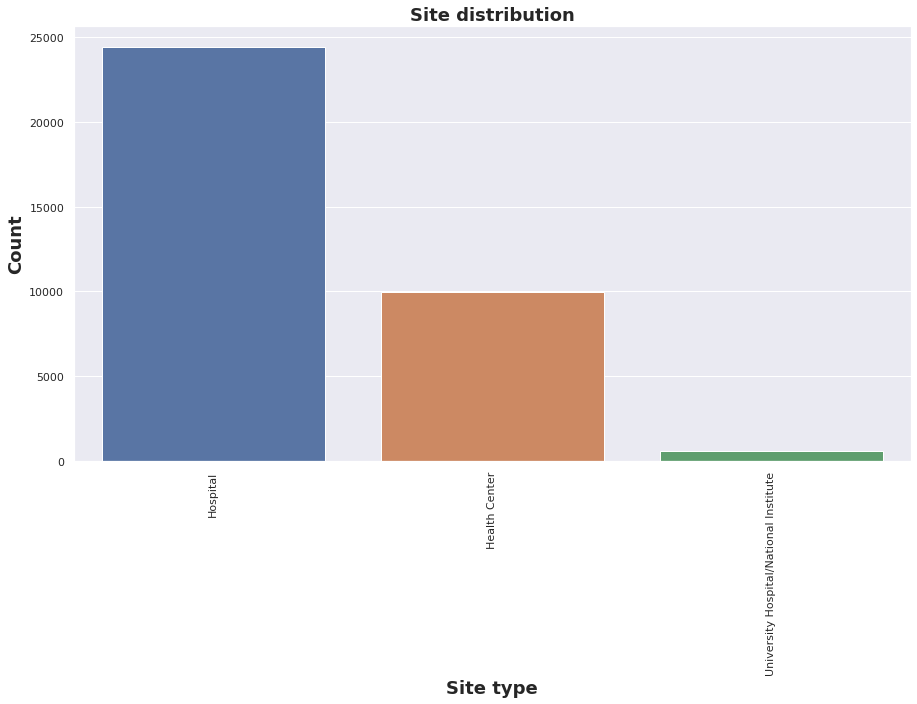

In [ ]:
#Plotting site ditribution 
fontsize = 18
plt.figure(figsize=(15,8))
sns.countplot(train_eda['site_type'],data= train_eda, order = train_eda['site_type'].value_counts().index)
plt.title('Site distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Site type',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count',weight='bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


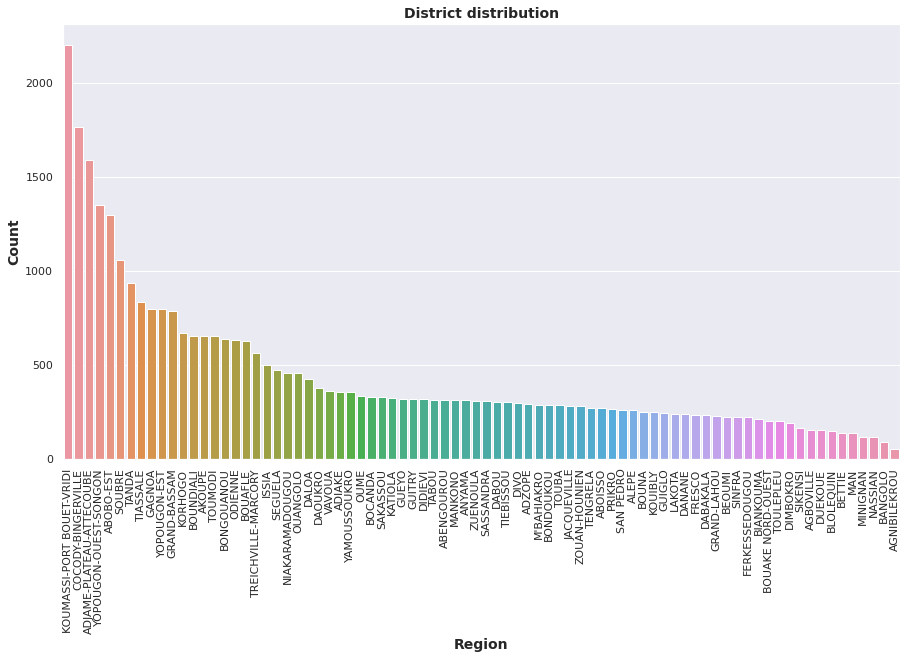

In [ ]:
#Plotting district ditribution 
fontsize = 14
plt.figure(figsize=(15,8))
sns.countplot(train_eda['district'],data= train_eda, order = train_eda['district'].value_counts().index)
plt.title('District distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Region',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count', weight = 'bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

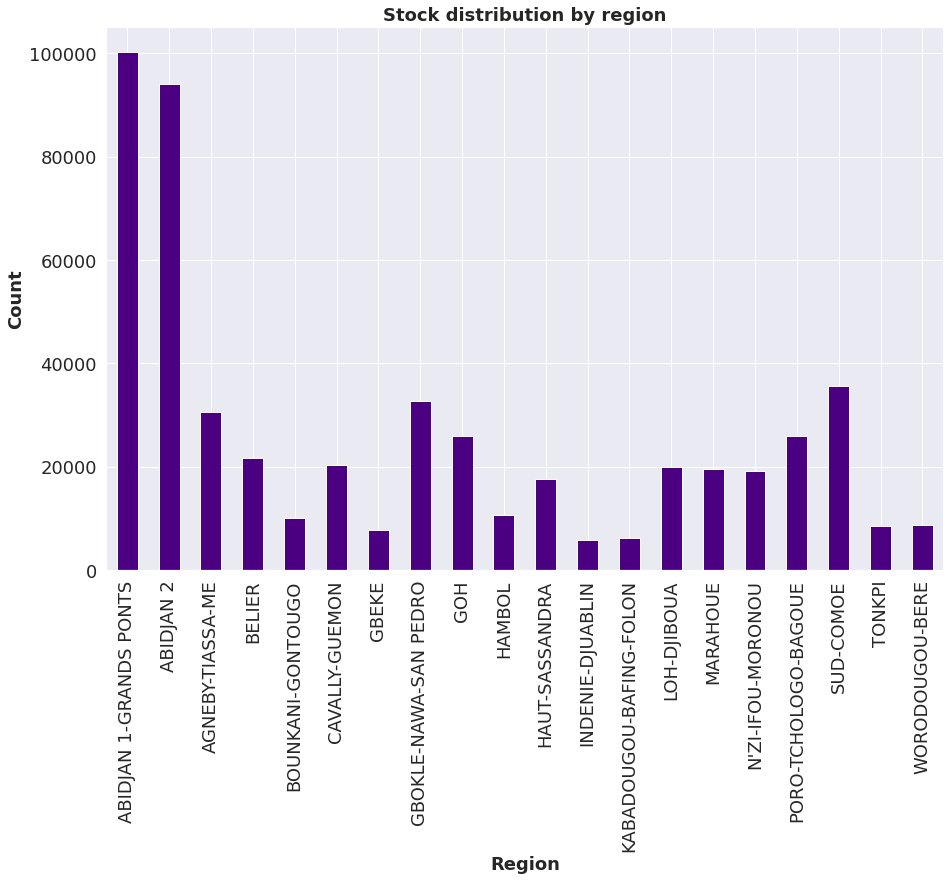

In [ ]:
#Plotting stock distribution by region
fontsize = 18
region = train.groupby('region')['stock_distributed'].sum()
region.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize);
plt.title('Stock distribution by region' ,weight ='bold',fontsize= fontsize)
plt.xlabel('Region' ,weight='bold',fontsize= fontsize)
plt.ylabel('Count', weight= 'bold',fontsize= fontsize)
plt.show()

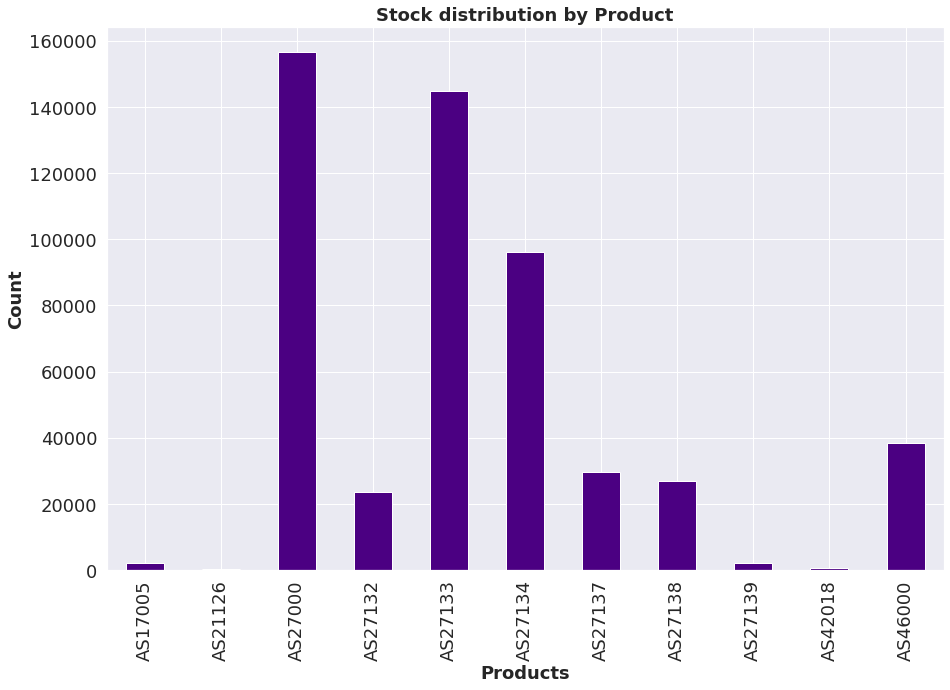

In [ ]:
#Plotting stock distribution by product code
fontsize = 18
region = train.groupby('product_code')['stock_distributed'].sum()
region.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize);
plt.title('Stock distribution by Product' ,weight ='bold',fontsize= fontsize)
plt.xlabel('Products' ,weight='bold',fontsize= fontsize)
plt.ylabel('Count', weight= 'bold',fontsize= fontsize)
plt.show()

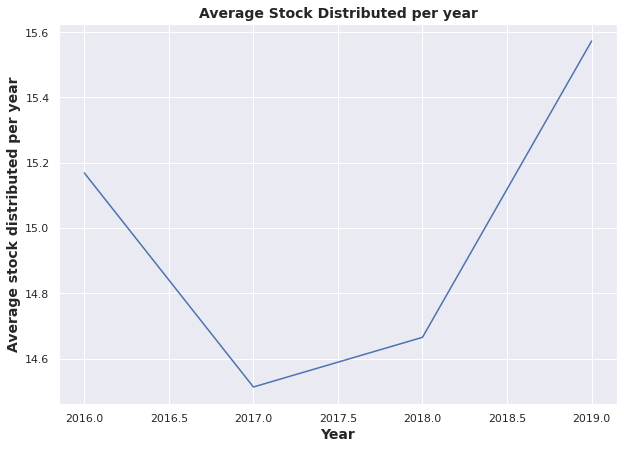

In [ ]:
#Plotting stock ditribution per year 
plt.figure(figsize=(10,7))
fontsize = 14
g = train_eda.groupby('year')['stock_distributed'].mean().reset_index(name = 'average stock distributed per year')
sns.lineplot(x = 'year', data = g, y='average stock distributed per year')
plt.title('Average Stock Distributed per year',weight ='bold',fontsize= fontsize)
plt.xlabel('Year',weight ='bold',fontsize= fontsize)
plt.ylabel('Average stock distributed per year',weight ='bold',fontsize= fontsize)
plt.show() 

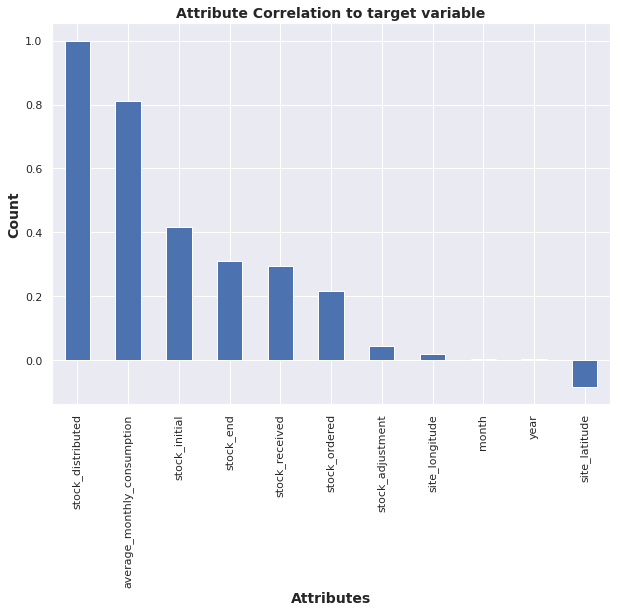

In [ ]:
#plotting attribute correlation to traget variable
fontsize = 14
figsize = [10,7]
correlation = train_eda.corr()
correlation['stock_distributed'].sort_values(ascending=False).plot(kind='bar',figsize=figsize)
plt.title('Attribute Correlation to target variable', weight ='bold',fontsize= fontsize)
plt.xlabel('Attributes',weight ='bold',fontsize= fontsize)
plt.ylabel('Count',weight ='bold',fontsize= fontsize)
plt.show()

In [ ]:
#Drawing  a line plot of the number of cases
#sns.lineplot(x="year", y="stock_distributed", data=train_eda)

#Creating labels for the line graph
#plt.title("Line Graph of total number distributed among years")
#plt.xlabel("Year")
#plt.ylabel("Total distribution")

#plt.show()

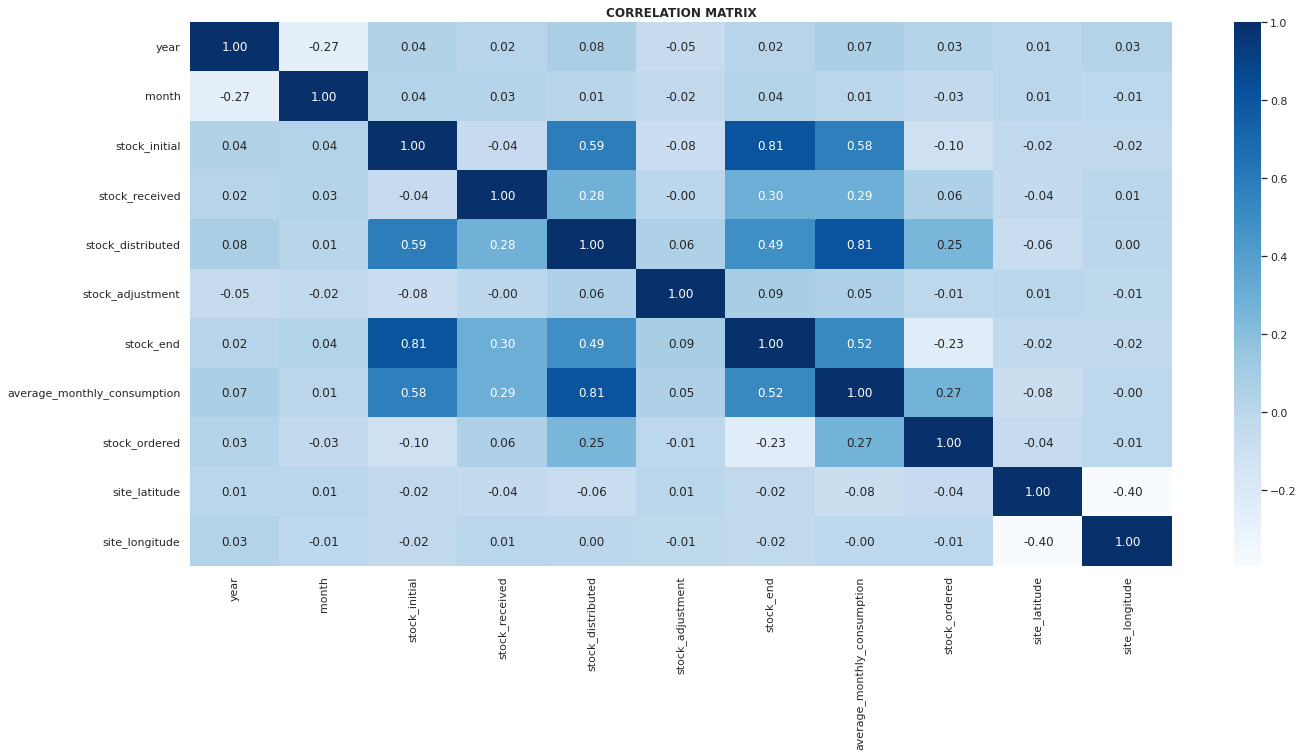

In [ ]:
#To check for correlation between the variables:
plt.figure(figsize = (22, 10))
corr = train_eda.corr(method = 'spearman')
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt=".2f")
plt.title('CORRELATION MATRIX', y=1.5,weight='bold')
plt.show()

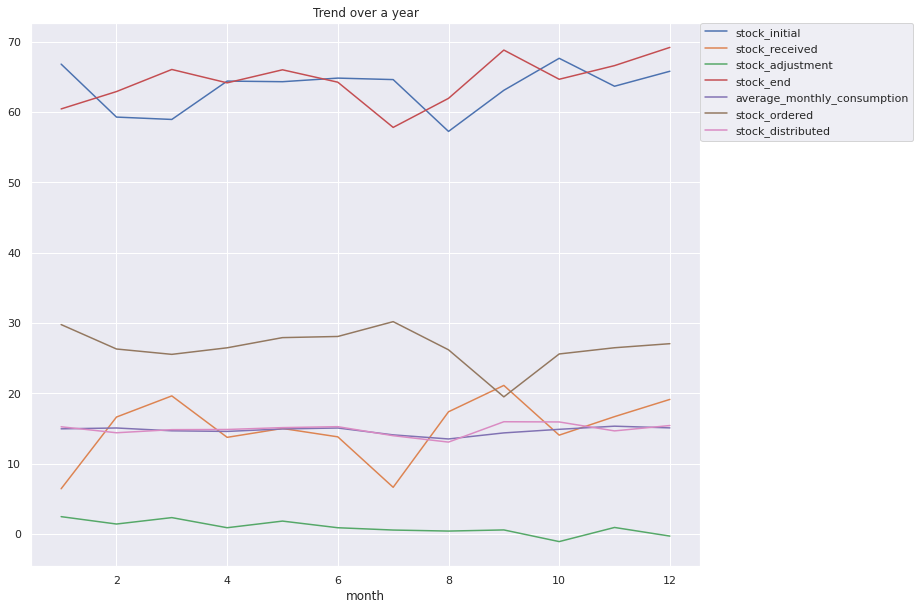

In [ ]:
# Monthly Data
monthly_data = train_eda.groupby('month').mean()[['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end','average_monthly_consumption', 'stock_ordered', 'stock_distributed']]
sns.set(rc={'figure.figsize':(12,10)})
monthly_data.plot.line()
plt.title('Trend over a year')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

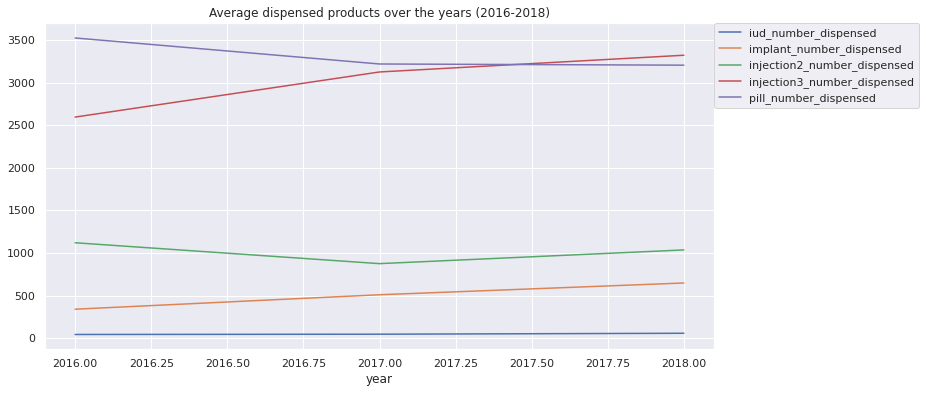

In [ ]:
# Line plot for dispensed products over the years
dispensed = annual_data.groupby('year').mean()[['iud_number_dispensed','implant_number_dispensed','injection2_number_dispensed','injection3_number_dispensed','pill_number_dispensed']]
sns.set(rc={'figure.figsize':(12,6)})
dispensed.plot.line()
plt.title('Average dispensed products over the years (2016-2018)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

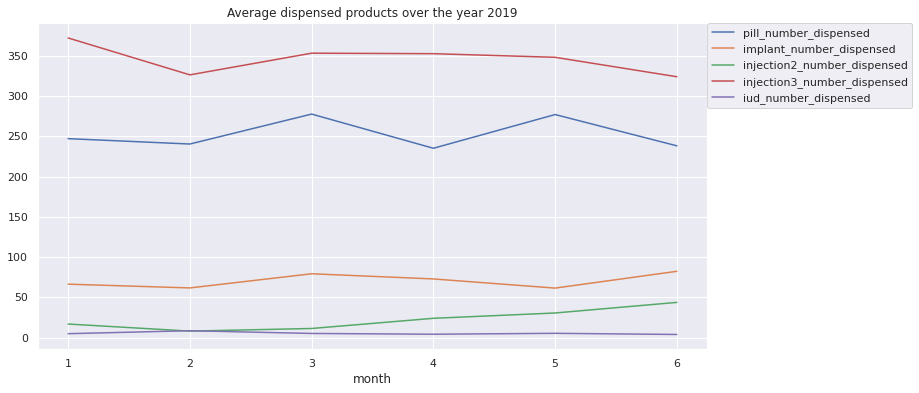

In [ ]:
# Line plot for dispensed products over the year 2019
dispensed_2019 = mon_data.groupby('month').mean()[['pill_number_dispensed','implant_number_dispensed','injection2_number_dispensed','injection3_number_dispensed','iud_number_dispensed']]
sns.set(rc={'figure.figsize':(12,6)})
dispensed_2019.plot.line()
plt.title('Average dispensed products over the year 2019')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
train.to_csv("train_cleaned.csv")

##Feature Engineering

In [ ]:
train.head(5)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
date,,,,,,,,,,,,,,,,,,
2016-01-01,2016,1,N'ZI-IFOU-MORONOU,DAOUKRO,C4019,AS27133,0,0,0,0,0,0,25.0,Hospital,7.057710,-3.964550,Injectable Contraceptive,DEPO PROVERA/PETOGEN 150 MG / 3ML INJ BTE/25 B...
2016-01-01,2016,1,ABIDJAN 2,KOUMASSI-PORT BOUET-VRIDI,C1058,AS27000,0,200,88,0,112,88,200.0,Hospital,5.287367,-3.969162,Oral Contraceptive (Pill),MICROGYNON 0.03/0.15 MG BTE / 3 CYCLES BOITE
2016-01-01,2016,1,SUD-COMOE,GRAND-BASSAM,C1090,AS27132,72,0,10,0,62,22,0.0,Hospital,5.207400,-3.735600,Oral Contraceptive (Pill),MICROLUT 0.03 MG BTE / 3 CYCLES BOITE
2016-01-01,2016,1,AGNEBY-TIASSA-ME,TIASSALE,C1112,AS27134,160,0,0,0,160,0,0.0,Hospital,5.890294,-4.829082,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2016-01-01,2016,1,ABIDJAN 1-GRANDS PONTS,YOPOUGON-EST,C1017,AS27134,0,0,0,0,0,0,8.0,Health Center,5.364084,-4.066931,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE


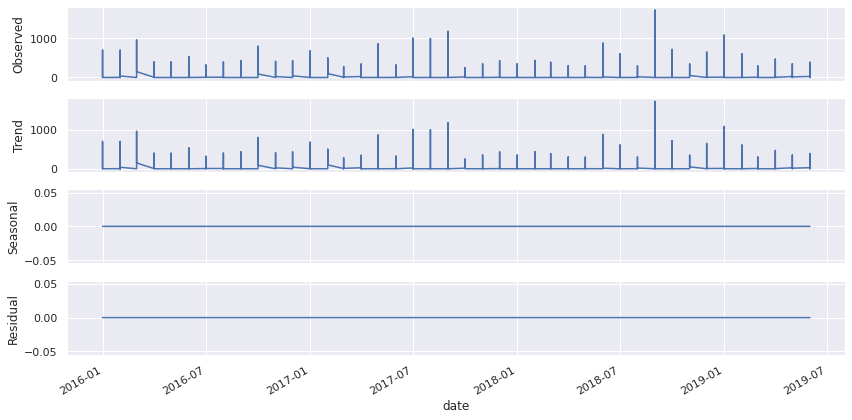

In [ ]:
# Time series decomposition 

import statsmodels.api as sm
sns.set(rc={'figure.figsize':(12,6)})
decomposition = sm.tsa.seasonal_decompose (train['stock_distributed'],freq=1, model = 'additive')
fig = decomposition.plot()

There is no trend and seasonality.

In [ ]:
# Testing for stationarity
import statsmodels.tsa.stattools as sts
#ADF TEST
results = sts.adfuller(train['stock_distributed'])

print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -32.90370379950303
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Null Hypothesis- Series is not stationary
Alt Hypothesis- Series is stationary

P-VALUE is less that 0.05 so we reject the null hypothesis and infer that null hypothesis is stationary.


##TEST FOR WHITE NOISE

The Ljung-Box test 


In [ ]:
# Testing for white noise using the Ljung-Box test 
import statsmodels.stats.diagnostic as diag
b = diag.acorr_ljungbox(train['stock_distributed'], lags=[50], boxpierce=True)
print(f"\nLjung-Box test\nljung Statistic: {b[0]}")
print(f"p value: {b[1]}")
#print(f"\nBoxpierce\nQ Statistic: {t[2]}")
#print(f"p value: {t[3]}")


Ljung-Box test
ljung Statistic: [137.39131373]
p value: [4.37770237e-10]


With the p-value being less than 0.05, this indicates a significant auto-correlation. Thus we can conclude that the time series is not pure white noise.

##TEST FOR RANDOM WALK

Random walk is a white noise which is auto-correlated.

To test for random walk we take the first difference of the time series that is suspected to be a random walk, and run the white noise tests on the differenced series.

In [ ]:
# First differencing the series 
diff_stock_dis = train['stock_distributed'].diff()

# Drop the nan in the first row
diff_stock_dis = diff_stock_dis.dropna()

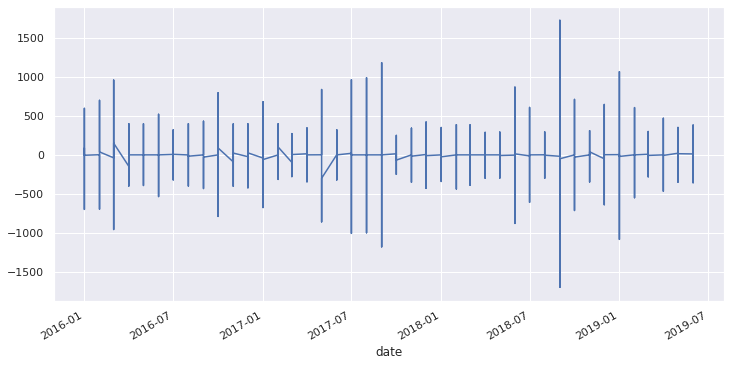

In [ ]:
# plotting the differenced time series 

diff_stock_dis.plot()
plt.show()

In [ ]:
# Running the Ljung-Box test on the differenced data set:
r = diag.acorr_ljungbox(diff_stock_dis, lags=[40], boxpierce=True)
print(f"\nLjung-Box test\nljung Statistic: {r[0]}")
print(f"p value: {r[1]}")
print(f"\nBoxpierce\nQ Statistic: {r[2]}")
print(f"p value: {r[3]}")


Ljung-Box test
ljung Statistic: [8910.55035158]
p value: [0.]

Boxpierce
Q Statistic: [8909.76566962]
p value: [0.]


With the p-value being less than 0.05, we can conclude that the time series is neither white noise nor random walk.

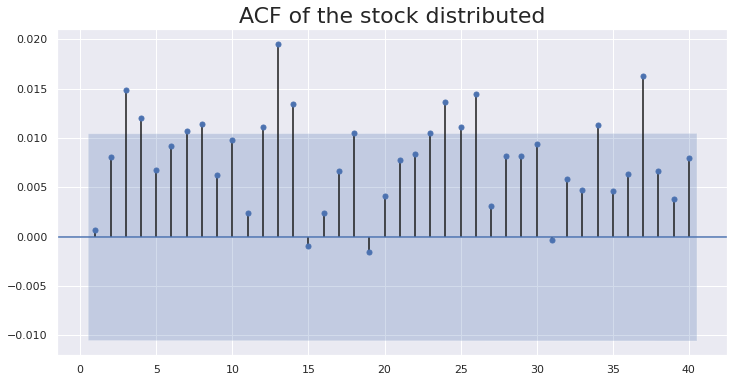

In [ ]:
# Checking for autocorrelation
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(train['stock_distributed'], lags = 40, zero = False)
plt.title('ACF of the stock distributed', size =22)
plt.show()

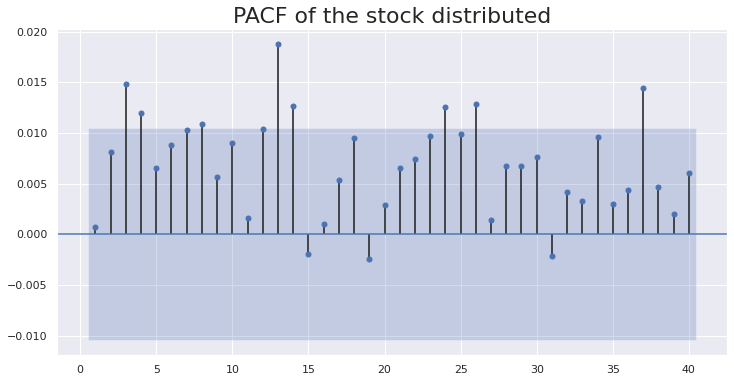

In [ ]:
sgt.plot_pacf(train['stock_distributed'], lags = 40, zero = False, method =('ols'))
plt.title('PACF of the stock distributed', size =22)
plt.show()

In [ ]:
#installing category encoder
!pip install category_encoders

In [ ]:
# encode categorical variables with ordinal encoding
import category_encoders as ce

encoder = ce.OrdinalEncoder(train.columns)
train = encoder.fit_transform(train)
train.head(5)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
date,,,,,,,,,,,,,,,,,,
2016-01-01,2016,1,1,1,1,1,0,0,0,0,0,0,25.0,1,7.057710,-3.964550,1,1
2016-01-01,2016,1,2,2,2,2,0,200,88,0,112,88,200.0,1,5.287367,-3.969162,2,2
2016-01-01,2016,1,3,3,3,3,72,0,10,0,62,22,0.0,1,5.207400,-3.735600,2,3
2016-01-01,2016,1,4,4,4,4,160,0,0,0,160,0,0.0,1,5.890294,-4.829082,1,4
2016-01-01,2016,1,5,5,5,4,0,0,0,0,0,0,8.0,2,5.364084,-4.066931,1,4


In [ ]:
#Label Encoding 
#from sklearn.preprocessing import LabelEncoder 
#en = LabelEncoder()
#train['product_code'] = en.fit_transform(train['product_code'])
#train['site_code'] = en.fit_transform(train['site_code'])
#train['region'] = en.fit_transform(train['region'])
#train['district'] = en.fit_transform(train['district'])


[0.01160962 0.0164544  0.01026189 0.01027525 0.01339139 0.0206198
 0.12697908 0.0341007  0.01417278 0.05272766 0.60166251 0.02298062
 0.00727632 0.0135219  0.0111008  0.01489782 0.01796746]


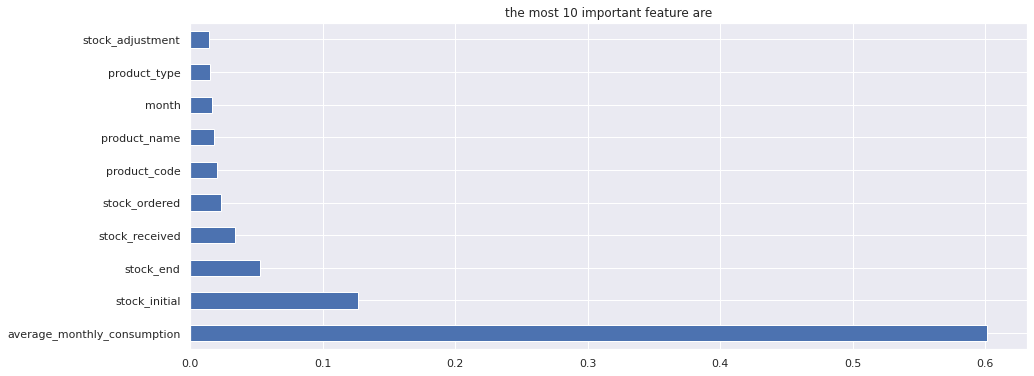

In [ ]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = train.drop('stock_distributed', axis=1)
y = train['stock_distributed']

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

In [ ]:
#Features and target

y = train['stock_distributed']
X = train[['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption']]
       

## 7. Implementing the Solution

In [ ]:
# Use the timeseries split
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

for train_index, test_index in tss.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [   0    1    2 ... 5832 5833 5834] TEST: [ 5835  5836  5837 ... 11663 11664 11665]
TRAIN: [    0     1     2 ... 11663 11664 11665] TEST: [11666 11667 11668 ... 17494 17495 17496]
TRAIN: [    0     1     2 ... 17494 17495 17496] TEST: [17497 17498 17499 ... 23325 23326 23327]
TRAIN: [    0     1     2 ... 23325 23326 23327] TEST: [23328 23329 23330 ... 29156 29157 29158]
TRAIN: [    0     1     2 ... 29156 29157 29158] TEST: [29159 29160 29161 ... 34987 34988 34989]


Considering that the observations in a time series data are not independent, we used the TimeSeriesSplit function which separates the test data from the training data in a sequential manner i.e our train data ran from 2016 to early 2019 while the test data ran from 2019 January to 2019 June.

In [ ]:
# SCALING AND NORMALIZING OUR DATA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [ ]:
#Creating Linear Regression model 

#Importing Linear model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fit train dataset to model 
model.fit(X_train,y_train)
#Predicting using train model 
y_pred = model.predict(X_test)

In [ ]:
#Model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (model.score(X_test, y_test )* 100).round(2))

Mean squared error (MSE): 0.00000
Mean Absolute Error (MAE): 6.33651556500175e-14
Root Mean Squared Error (RMSE) : 2.2204710174183811e-13
Accuracy 100.0


In [ ]:
#Residual (Difference between predicted and actual observations)
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

5.77500280108775e-14

In [ ]:
#check for hetorskacity using Barltletts test 
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(value)

if (test_result >value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


### Polynomial Model

In [ ]:
# Fitting the model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
# Making a prediction
pred=  pol_reg.predict(poly_reg.fit_transform(X_test))

In [ ]:
# Evaluating the model
print("The MAE for the Polynomial regression is:", mean_absolute_error(y_test, pred))
print("The MSE for the Polynomial regression is:", mean_squared_error(y_test, pred))
print("The r2 for the Polynomial regression is:", r2_score(y_test, pred)*100)
print("The RMSE for the Polynomial regression is:", np.sqrt(mean_squared_error(y_test, pred)))

The MAE for the Polynomial regression is: 3.3187428132904086e-10
The MSE for the Polynomial regression is: 1.1014072400999591e-19
The r2 for the Polynomial regression is: 100.0
The RMSE for the Polynomial regression is: 3.318745606550703e-10


In [ ]:
#X = train.drop('stock_distributed', axis=1)
#y = train['stock_distributed']

### Random Forest Regressor

In [ ]:
# Random Forest Regressor
# Import the model
from sklearn.ensemble import RandomForestRegressor
 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:",r2_score(y_test, y_pred))

Mean Absolute Error: 6.7973415295893895
Mean Squared Error: 434.62654903644625
Root Mean Squared Error: 20.847698890679666
R2 Score: 0.7022095174770527


Hyperparameter tuning

In [ ]:
# number of trees
#n_estimators = [100, 200, 300, 400]
# max number of features
#max_features = ['auto', 'sqrt', 'log2']
# max number of levels in tree
#max_depth = [3, 5, 7, 10]
# minimum number of samples required to split a node
#min_samples_split = [2, 5, 10, 15, 20]
# minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 5, 10]

# Parameter grid
#grid_param = {'n_estimators' : n_estimators,
#               'max_features' : max_features,
 #              'max_depth' : max_depth, 
 #              'min_samples_split' : min_samples_split}

In [ ]:
# GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#RFR = RandomForestRegressor(random_state=1)
#RFR_random = GridSearchCV(estimator = RFR,
 #                               param_grid = grid_param, 
 #                               cv = 5,
#                                verbose = 2, 
  #                              n_jobs = -1)

#RFR_random.fit(X, y)
#print(RFR_random.best_params_)

Gradient Boost

In [ ]:
# Importing the gradient boost model
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0, learning_rate=0.1)
reg.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = reg.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 6.436143511745006
Mean Squared Error: 458.953539809417
Root Mean Squared Error: 21.423200970196238
R2 Score: 0.6855415381815524


Catboost Regressor

In [ ]:
# importing the catboost regressor
!pip3 install catboost
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=0, verbose=0)
cat.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = cat.predict(X_test)

# And now we assess the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 2.401212591536242
Mean Squared Error: 53.49664994396833
Root Mean Squared Error: 7.314140410463032
R2 Score: 0.9633460191617526


ARIMA MODEL

In [ ]:
train.drop(columns=['month','year'], inplace = True)

In [ ]:
#Getting optimal orders of ARIMA
#!pip install pmdarima
#model = pm.auto_arima(train['stock_distributed'],m=5,seasonal=True,
#model = pm.auto_arima(train['stock_distributed'],m=5,seasonal=True,
#start_p=0,start_q=0,max_order=4,test='adf',error_action='ignore',suppress_warning=True,stepwise=True,trace=True)

In [ ]:
# importing the auto autp_arima
#!pip install pmdarima
#Getting the optimal p,d,q, for arima
#from pmdarima import auto_arima
#stepwise_fit = auto_arima(train['stock_distributed'], trace=True,
#suppress_warnings=True)

In order to obtain the optimal order i.e. p,d,q for our ARIMA model, we installed the pmdarima module then used the auto_arima function that gave us the best order 

In [ ]:
#Using the time series split to split our dataset
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

for train_index, test_index in tss.split(train):
    t_train, t_test = train.iloc[train_index], train.iloc[test_index]


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


Having already defined our dependent and independent variables, we split our data using the TimeSeriesSplit so that we can separate the training from the test data in a sequential manner.

In [ ]:
#fitting our arima model 
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(t_train['stock_distributed'],order=(2,0,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      stock_distributed   No. Observations:                29159
Model:                     ARMA(2, 1)   Log Likelihood             -149252.491
Method:                       css-mle   S.D. of innovations             40.433
Date:                Fri, 25 Feb 2022   AIC                         298514.983
Time:                        06:56:44   BIC                         298556.386
Sample:                             0   HQIC                        298528.285
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      14.7416      0.334     44.144      0.000      14.087      15.396
ar.L1.stock_distributed     0.9795      0.009    113.287      0.000       0.963       0.996
ar.L2.stock_distributed     0.0062      0.006      1.037      0.300      -0.005       0.018
ma.L1.stock_distributed    -0.9798      0.006   -153.856      0.000      -0.992      -0.967
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0144           +0.0000j            1.0144            0.0000
AR.2         -159.5902           +0.0000j          159.5902            0.5000
MA.1            1.0206           +0.0000j            1.0206            0.0000
-----------------------------------------------------------------------------
"""

We then fit our ARIMA model to our target variable using the order we obtained from the auto arima function.

In [ ]:
train.tail(3)

,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
date,,,,,,,,,,,,,,,,
2019-06-01,6,42,94,1,101,0,10,0,91,3,0.0,1,6.27538,-7.00296,1,1
2019-06-01,16,53,84,3,16,0,15,0,1,10,29.0,1,9.27075,-2.99260,2,3
2019-06-01,17,41,59,10,68,0,3,0,65,12,0.0,2,6.92558,-6.04772,7,10


In [ ]:
# predicting our from the arima model
start=len(t_train)
#start=pd.to_datetime('2019-10-01')
#end= pd.to_datetime('2019-12-01')
end=len(t_train)+len(t_test)-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')

pred.index = train.index[start:end+1]
print(pred)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


date
2019-01-01    13.031112
2019-01-01    12.975093
2019-01-01    13.000714
2019-01-01    13.025465
2019-01-01    13.049866
                ...    
2019-06-01    14.741558
2019-06-01    14.741558
2019-06-01    14.741558
2019-06-01    14.741558
2019-06-01    14.741558
Name: ARIMA Predictions, Length: 5831, dtype: float64


We set the start and end date using the dates in our train and test datasets respectively before predicting using our ARIMA model.

(0.0, 250.0)

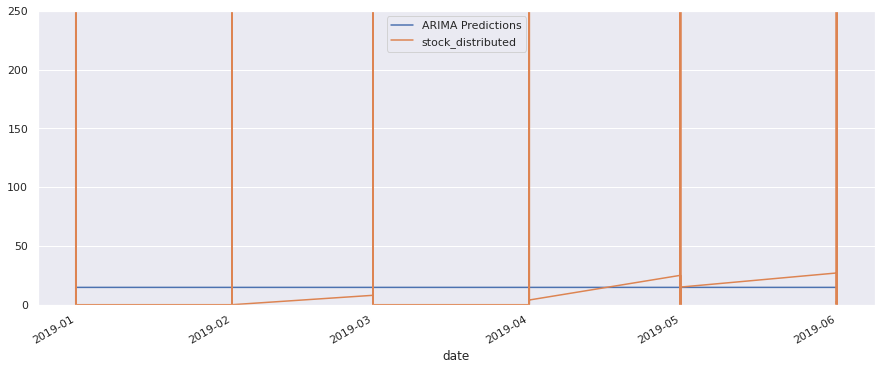

In [ ]:
# Plotting the arima model against the actual values
pred.plot(legend=True)
t_test['stock_distributed'].plot(legend=True)
plt.ylim(0,250)

In [ ]:
#Getting our mean of our column
from sklearn.metrics import mean_squared_error
from math import sqrt
t_test['stock_distributed'].mean()

15.62493568856114

In [ ]:
#Getting rmse of the model
rmse=sqrt(mean_squared_error(pred,t_test['stock_distributed']))
print(rmse)

38.21507720448606


In [ ]:
#Predicting the future
index_future_dates = pd.date_range(start = '2019-10-01', end = '2019-12-01', freq='MS')

n_forecast = 3
predict = model.predict(start=len(t_train),end=len(t_train) + n_forecast-1).rename("Arima Forecast")

predict.index = index_future_dates
print(predict)

2019-10-01    13.031112
2019-11-01    12.975093
2019-12-01    13.000714
Freq: MS, Name: Arima Forecast, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


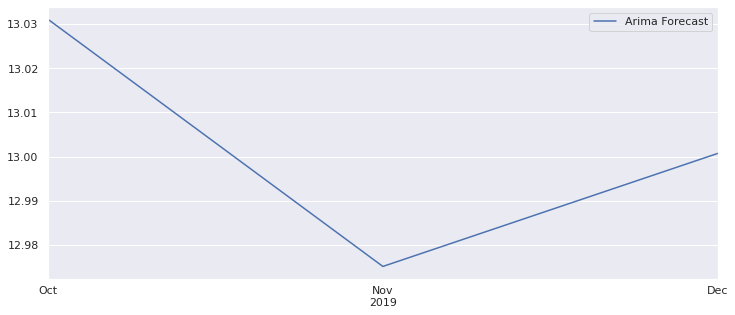

In [ ]:
#Plotting forecast 
predict.plot(figsize=(12,5), legend = True)
#t_test['stock_distributed'].plot(legend=True)


## PROPHET

In [ ]:
# selecting the date column and our target column 
 
train2 = train2[['date','stock_distributed']]
train2.head()

,date,stock_distributed
0,2019-01-01,21
1,2019-02-01,0
2,2019-03-01,0
3,2019-04-01,2
4,2019-05-01,31


In [ ]:
from pandas import to_datetime
train2.date = pd.to_datetime(train2.date)
train2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date,stock_distributed
0,2019-01-01,21
1,2019-02-01,0
2,2019-03-01,0
3,2019-04-01,2
4,2019-05-01,31


In [ ]:
# fit prophet model on our dataset
from fbprophet import Prophet

train2.columns = ['ds', 'y']
# define the model
model = Prophet()
# fit the model
model.fit(train2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates=model.make_future_dataframe(periods=7, freq='M')
future_dates.tail(5)

,ds
44,2019-08-31
45,2019-09-30
46,2019-10-31
47,2019-11-30
48,2019-12-31


In [ ]:
# use the model to make a forecast
forecast = model.predict(future_dates)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
#forecast.tail(5)


           ds       yhat  yhat_lower  yhat_upper
0  2016-01-01  15.244655  -38.372012   66.564756
1  2016-02-01  12.297994  -36.786465   65.843830
2  2016-03-01  14.707802  -37.714935   66.113326
3  2016-04-01  13.301999  -36.798837   64.760897
4  2016-05-01  15.232952  -35.531454   68.788492
5  2016-06-01  14.274320  -37.384547   65.639102
6  2016-07-01  14.017376  -38.000514   64.197596
7  2016-08-01  14.386137  -38.358930   63.639486
8  2016-09-01  17.071876  -32.866262   67.784665
9  2016-10-01  16.990650  -30.797057   64.073546
10 2016-11-01  16.427658  -34.603719   68.500970
11 2016-12-01  16.400817  -34.609465   69.385800
12 2017-01-01  15.410537  -36.709901   65.170853
13 2017-02-01  16.409410  -33.549702   68.503325
14 2017-03-01  16.515419  -36.431802   67.900310
15 2017-04-01  15.159223  -35.687588   66.489246
16 2017-05-01  15.310746  -33.452483   67.301248
17 2017-06-01  13.943490  -35.641005   64.922083
18 2017-07-01  12.849209  -37.238493   64.527898
19 2017-08-01  11.78

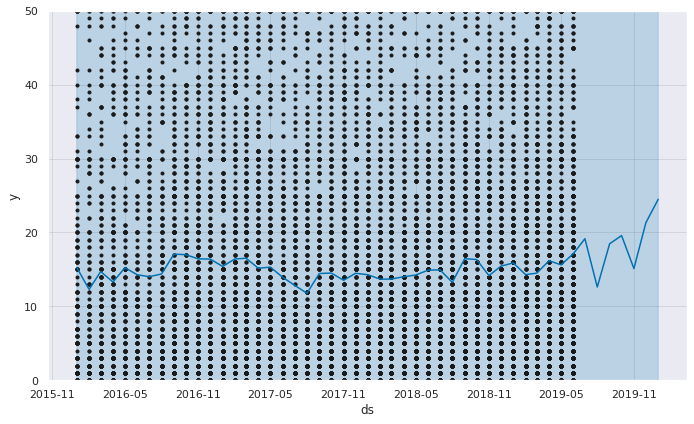

In [ ]:
# plot forecast
model.plot(forecast)
plt.ylim(0,50)
plt.show()

In [ ]:
# we compare values for the true values and the forecasted 
y_train = train2['y'][-49:].values
y_pred = forecast['yhat'].values

In [ ]:
# calculating  MAE and RMSE  
mae = mean_absolute_error(y_train, y_pred)
rmse = sqrt(mean_squared_error(y_train, y_pred))
print(mae)
print(rmse)

15.396892764393005
15.560101090706912


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?